In [1]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

In [2]:
# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

In [53]:
# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import datasets, linear_model
from sklearn.cluster import KMeans

In [4]:
# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

In [5]:
# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [6]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [7]:
archivos2014 =['uber-raw-data-may14.csv',
                'uber-raw-data-apr14.csv',
                'uber-raw-data-jul14.csv',
                'uber-raw-data-jun14.csv',
                'uber-raw-data-sep14.csv',
                'uber-raw-data-aug14.csv']
df2014 = pd.DataFrame()
for file in archivos2014:
    df = pd.read_csv(file,encoding='utf-8')
    df2014 = pd.concat([df,df2014])

In [8]:
df2014

,Date/Time,Lat,Lon,Base
0,8/1/2014 0:03:00,40.73660,-73.99060,B02512
1,8/1/2014 0:09:00,40.72600,-73.99180,B02512
2,8/1/2014 0:12:00,40.72090,-74.05070,B02512
3,8/1/2014 0:12:00,40.73870,-73.98560,B02512
4,8/1/2014 0:12:00,40.73230,-74.00770,B02512
...,...,...,...,...
652430,5/31/2014 23:45:00,40.73090,-74.00140,B02764
652431,5/31/2014 23:52:00,40.75280,-73.97980,B02764
652432,5/31/2014 23:55:00,40.71580,-73.95190,B02764
652433,5/31/2014 23:56:00,40.69610,-73.89970,B02764


In [9]:
df2014['Date/Time'].head(5)

0    8/1/2014 0:03:00
1    8/1/2014 0:09:00
2    8/1/2014 0:12:00
3    8/1/2014 0:12:00
4    8/1/2014 0:12:00
Name: Date/Time, dtype: object

In [10]:
df2014['Date/Time'] = pd.to_datetime(df2014['Date/Time'], format="%m/%d/%Y %H:%M:%S")

In [11]:
df2014['DiaSemana'] = df2014['Date/Time'].dt.dayofweek
df2014['DiaMes'] = df2014['Date/Time'].dt.day
df2014['Hora'] = df2014['Date/Time'].dt.hour
df2014['DiaSemana'] = df2014['Date/Time'].dt.day_name()
df2014['Mes'] = df2014['Date/Time'].dt.month
df2014['Minuto'] = df2014['Date/Time'].dt.minute

In [12]:
df2014.duplicated().sum()
print(df2014.duplicated().sum())
df2014.drop_duplicates(inplace=True)
df2014.head(5)

82581


,Date/Time,Lat,Lon,Base,DiaSemana,DiaMes,Hora,Mes,Minuto
0,2014-08-01 00:03:00,40.73660,-73.99060,B02512,Friday,1,0,8,3
1,2014-08-01 00:09:00,40.72600,-73.99180,B02512,Friday,1,0,8,9
2,2014-08-01 00:12:00,40.72090,-74.05070,B02512,Friday,1,0,8,12
3,2014-08-01 00:12:00,40.73870,-73.98560,B02512,Friday,1,0,8,12
4,2014-08-01 00:12:00,40.73230,-74.00770,B02512,Friday,1,0,8,12


In [13]:
def esFinde(dia):
    if dia == 'Sunday' or dia == 'Saturday' :
        return 0
    else:
        return 1

In [14]:
df2014['DiaLaboral'] = df2014['DiaSemana'].apply(esFinde)

In [15]:
df2014.head()

,Date/Time,Lat,Lon,Base,DiaSemana,DiaMes,Hora,Mes,Minuto,DiaLaboral
0,2014-08-01 00:03:00,40.73660,-73.99060,B02512,Friday,1,0,8,3,1
1,2014-08-01 00:09:00,40.72600,-73.99180,B02512,Friday,1,0,8,9,1
2,2014-08-01 00:12:00,40.72090,-74.05070,B02512,Friday,1,0,8,12,1
3,2014-08-01 00:12:00,40.73870,-73.98560,B02512,Friday,1,0,8,12,1
4,2014-08-01 00:12:00,40.73230,-74.00770,B02512,Friday,1,0,8,12,1


In [16]:
df2014['DiaSemana'] = df2014['DiaSemana'].replace('Monday', '1')
df2014['DiaSemana'] = df2014['DiaSemana'].replace('Tuesday', '2')
df2014['DiaSemana'] = df2014['DiaSemana'].replace('Wednesday', '3')
df2014['DiaSemana'] = df2014['DiaSemana'].replace('Thursday', '4')
df2014['DiaSemana'] = df2014['DiaSemana'].replace('Friday', '5')
df2014['DiaSemana'] = df2014['DiaSemana'].replace('Saturday', '6')
df2014['DiaSemana'] = df2014['DiaSemana'].replace('Sunday', '7')

In [17]:
df2014['DiaSemana'].astype(int)

0         5
1         5
2         5
3         5
4         5
         ..
652430    6
652431    6
652432    6
652433    6
652434    6
Name: DiaSemana, Length: 4451746, dtype: int32

In [18]:
datos_2=df2014. groupby (['DiaMes','DiaSemana','Hora','DiaLaboral']). agg ({'Hora': ['count']}). reset_index ()

In [19]:
datos_2.drop_duplicates(inplace=True)

In [20]:
df_lluvias = pd.read_excel("Lluvia.xlsx")
X2 = pd.merge(df2014, df_lluvias, how='left', left_on=['Hora', 'Mes','DiaMes'], right_on=['hora', 'mes', 'Dia'])
X2= X2.drop(['año', 'mes', 'Dia', 'hora', 'New York'], axis=1)

In [21]:
X2

,Date/Time,Lat,Lon,Base,DiaSemana,DiaMes,Hora,Mes,Minuto,DiaLaboral,Lluvia,temp
0,2014-08-01 00:03:00,40.73660,-73.99060,B02512,5,1,0,8,3,1,0,297.51000
1,2014-08-01 00:09:00,40.72600,-73.99180,B02512,5,1,0,8,9,1,0,297.51000
2,2014-08-01 00:12:00,40.72090,-74.05070,B02512,5,1,0,8,12,1,0,297.51000
3,2014-08-01 00:12:00,40.73870,-73.98560,B02512,5,1,0,8,12,1,0,297.51000
4,2014-08-01 00:12:00,40.73230,-74.00770,B02512,5,1,0,8,12,1,0,297.51000
...,...,...,...,...,...,...,...,...,...,...,...,...
4451741,2014-05-31 23:45:00,40.73090,-74.00140,B02764,6,31,23,5,45,0,0,292.80000
4451742,2014-05-31 23:52:00,40.75280,-73.97980,B02764,6,31,23,5,52,0,0,292.80000
4451743,2014-05-31 23:55:00,40.71580,-73.95190,B02764,6,31,23,5,55,0,0,292.80000
4451744,2014-05-31 23:56:00,40.69610,-73.89970,B02764,6,31,23,5,56,0,0,292.80000


In [49]:
datos_2=X2.groupby(['DiaMes','DiaSemana','Hora','DiaLaboral', 'Lluvia', 'temp','Mes']).agg({'Date/Time': ['count']}).reset_index()

### Cluster

In [51]:
df_lat_long = df2014[['Lat', 'Lon']]

In [54]:
scores = []

for i in range(2, 11):
    km = KMeans(n_clusters = i, random_state = 0)
    km.fit(df_lat_long)
    scores.append(km.inertia_)

KeyboardInterrupt: 

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(range(2,11), scores, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Metodo del codo')
plt.show()

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6, random_state=0)
kmeans.fit(df_lat_long)
y_kmeans = kmeans.predict(df_lat_long)

In [ ]:
df2014['cluster'] = y_kmeans

In [ ]:
df_cluster = pd.get_dummies(df2014['cluster'],prefix='cluster')
df2014['cluster0'] = df_cluster['cluster_0']
df2014['cluster1'] = df_cluster['cluster_1']
df2014['cluster2'] = df_cluster['cluster_2']
df2014['cluster3'] = df_cluster['cluster_3']
df2014['cluster4'] = df_cluster['cluster_4']
df2014['cluster5'] = df_cluster['cluster_5']

In [24]:
#datos_2.to_stata('DFdatos2.dta')

In [25]:
#datos_2=pd.read_stata('C:/Users/Cristian/Desktop/TAREA ANALÍTICA/uber/DFdatos2.dta')

In [26]:
datos_2

,DiaMes,DiaSemana,Hora,DiaLaboral,Lluvia,temp,Mes,Date/Time
,,,,,,,,count
0,1,1,0,1,0,298.01000,9,682
1,1,1,1,1,0,297.23000,9,480
2,1,1,2,1,0,297.23000,9,356
3,1,1,3,1,0,296.81000,9,329
4,1,1,4,1,0,296.72000,9,260
...,...,...,...,...,...,...,...,...
4386,31,7,19,0,1,303.45000,8,1315
4387,31,7,20,0,0,302.18000,8,1223
4388,31,7,21,0,0,299.70000,8,1395


In [27]:
datos_2= datos_2.rename(columns={'Date/Time':'flujo_hora'})

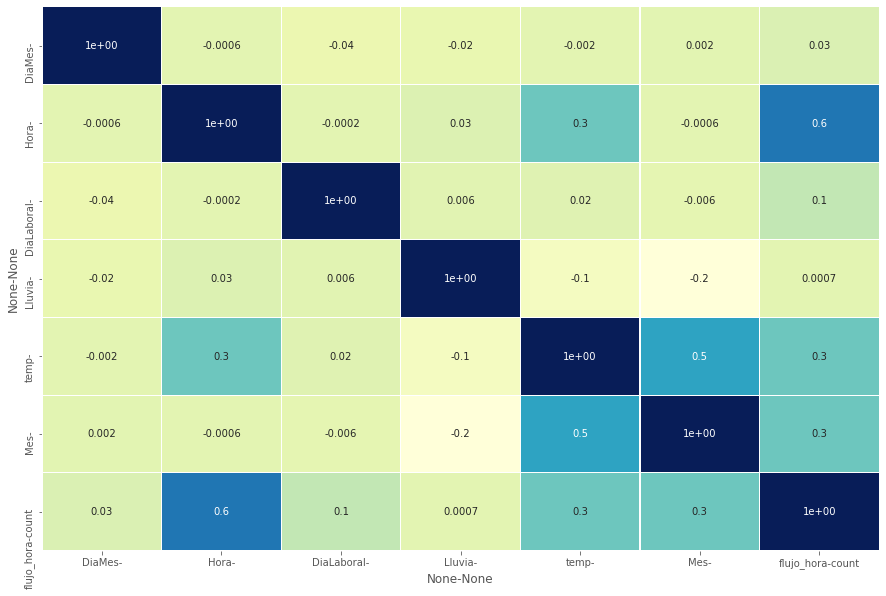

In [28]:
# Correlación entre columnas numéricas
data = datos_2.corr(method='pearson')
plt.figure(figsize=(15, 10))
sns.heatmap(data[0:9], annot=True,fmt='.0', linewidths=.1, cmap="YlGnBu", cbar=False)
plt.show()

# OLS

In [31]:
import statsmodels.formula.api as smf
reg = smf.ols('flujo_hora ~ DiaMes + Hora + DiaLaboral + Lluvia + temp + Mes',data=datos_2)
modelo = reg.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:             flujo_hora   R-squared:                       0.510
Model:                            OLS   Adj. R-squared:                  0.510
Method:                 Least Squares   F-statistic:                     761.6
Date:                Fri, 10 Jun 2022   Prob (F-statistic):               0.00
Time:                        18:00:45   Log-Likelihood:                -32978.
No. Observations:                4391   AIC:                         6.597e+04
Df Residuals:                    4384   BIC:                         6.601e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1049.6243    355.575      2.952      0.0

In [34]:
# División de los datos en train y test
# ==============================================================================
X = datos_2.drop(columns='flujo_hora')
y = datos_2[('flujo_hora')]

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.7,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [35]:
# Creación y entrenamiento del modelo
# ==============================================================================
modelo = LinearRegression(normalize=True)
modelo.fit(X = X_train, y = y_train)

LinearRegression(normalize=True)

In [41]:
# Información del modelo
# ==============================================================================
print("Intercept:", modelo.intercept_)
print("Coeficiente:", list(zip(X.columns, modelo.coef_.flatten(), )))
print("Coeficiente de determinación R^2:", modelo.score(X, y))

Intercept: [836.25746446]
Coeficiente: [(('DiaMes', ''), 2.11094470337558), (('DiaSemana', ''), 62.00640764901578), (('Hora', ''), 59.200139368517256), (('DiaLaboral', ''), 375.5403832824105), (('Lluvia', ''), 49.50385092168694), (('temp', ''), -6.396871951449842), (('Mes', ''), 124.14137159045237)]
Coeficiente de determinación R^2: 0.5252057071754929


Una vez entrenado el modelo, se evalúa la capacidad predictiva empleando el conjunto de test.

In [42]:
# Coeficientes del modelo
# ==============================================================================
df_coeficientes = pd.DataFrame(
                        {'predictor': X_train.columns,
                         'coef': modelo.coef_.flatten()}
                  )

AttributeError: 'MultiIndex' object has no attribute '_data'

In [43]:
# Coeficientes del modelo
# ==============================================================================
df_coeficientes = pd.DataFrame(
                        {'predictor': X_train.columns,
                         'coef': modelo.coef_.flatten()}
                  )

fig, ax = plt.subplots(figsize=(11, 3.84))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=5)
ax.set_xlabel('variable')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo');

AttributeError: 'MultiIndex' object has no attribute '_data'

In [513]:
# Predicciones test
# ==============================================================================
predicciones = modelo.predict(X=X_test)
predicciones = predicciones.flatten()
predicciones[:5]

array([4547.49853425, 3259.43066824, 4629.15715104, 2234.48513027,
       2265.82917891])

In [514]:
# Error de test del modelo 
# ==============================================================================
rmse_ols = mean_squared_error(
            y_true  = y_test,
            y_pred  = predicciones,
            squared = False
           )
print("")
print(f"El error (rmse) de test es: {rmse_ols}")


El error (rmse) de test es: 1828.3209201958962


Las predicciones del modelo final se alejan en promedio 1828.32 unidades del valor real.

RIDGE

In [492]:
reg = smf.ridge('flujo_hora ~ DiaMes + dia_sem + Hora + DiaLaboral',data=datos_2)
modelo = reg.fit()
print(modelo.summary())

AttributeError: module 'statsmodels.formula.api' has no attribute 'ridge'

In [276]:
# Creación y entrenamiento del modelo (con búsqueda por CV del valor óptimo alpha)
# ==============================================================================
# Por defecto RidgeCV utiliza el mean squared error
modelo = RidgeCV(
            alphas          = np.logspace(-10, 2, 200),
            fit_intercept   = True,
            normalize       = True,
            store_cv_values = True
         )

_ = modelo.fit(X = X_train, y = y_train)

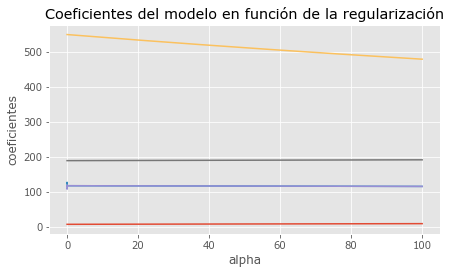

In [277]:
# Evolución de los coeficientes en función de alpha
# ==============================================================================
alphas = modelo.alphas
coefs = []

for alpha in alphas:
    modelo_temp = Ridge(alpha=alpha, fit_intercept=False, normalize=True)
    modelo_temp.fit(X_train, y_train)
    coefs.append(modelo_temp.coef_.flatten())

fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(alphas, coefs)
#ax.set_xscale('log')
ax.set_xlabel('alpha')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo en función de la regularización');
plt.axis('tight')
plt.show()

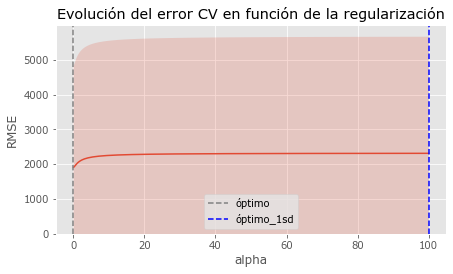

In [278]:
# Evolución del error en función de alpha
# ==============================================================================
# modelo.cv_values almacena el mse de cv para cada valor de alpha. Tiene
# dimensiones (n_samples, n_targets, n_alphas)
mse_cv = modelo.cv_values_.reshape((-1, 200)).mean(axis=0)
mse_sd = modelo.cv_values_.reshape((-1, 200)).std(axis=0)

# Se aplica la raíz cuadrada para pasar de mse a rmse
rmse_cv = np.sqrt(mse_cv)
rmse_sd = np.sqrt(mse_sd)

# Se identifica el óptimo y el óptimo + 1std
min_rmse     = np.min(rmse_cv)
sd_min_rmse  = rmse_sd[np.argmin(rmse_cv)]
min_rsme_1sd = np.max(rmse_cv[rmse_cv <= min_rmse + sd_min_rmse])
optimo       = modelo.alphas[np.argmin(rmse_cv)]
optimo_1sd   = modelo.alphas[rmse_cv == min_rsme_1sd]


# Gráfico del error +- 1 desviación estándar
fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(modelo.alphas, rmse_cv)
ax.fill_between(
    modelo.alphas,
    rmse_cv + rmse_sd,
    rmse_cv - rmse_sd,
    alpha=0.2
)

ax.axvline(
    x         = optimo,
    c         = "gray",
    linestyle = '--',
    label     = 'óptimo'
)

ax.axvline(
    x         = optimo_1sd,
    c         = "blue",
    linestyle = '--',
    label     = 'óptimo_1sd'
)
#ax.set_xscale('log')
ax.set_ylim([0,None])
ax.set_title('Evolución del error CV en función de la regularización')
ax.set_xlabel('alpha')
ax.set_ylabel('RMSE')
plt.legend();



In [281]:
# Mejor valor alpha encontrado
# ==============================================================================
print(f"Mejor valor de alpha encontrado: {modelo.alpha_}")

Mejor valor de alpha encontrado: 0.005231099308056258


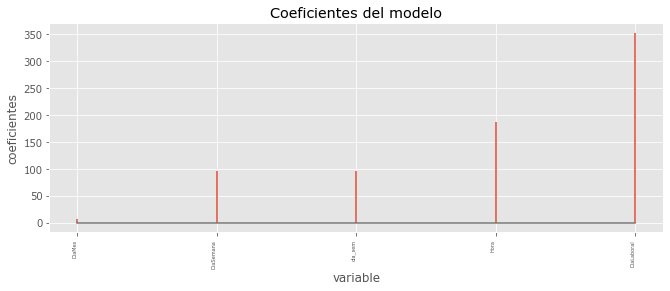

In [282]:
# Coeficientes del modelo
# ==============================================================================
df_coeficientes = pd.DataFrame(
                        {'predictor': X_train.columns,
                         'coef': modelo.coef_.flatten()}
                  )

fig, ax = plt.subplots(figsize=(11, 3.84))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=5)
ax.set_xlabel('variable')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo');

En comparación al modelo por mínimos cuadrados ordinarios, con ridge, el orden de magnitud de los coeficientes es similar.

In [283]:
# Predicciones test
# ==============================================================================
predicciones = modelo.predict(X=X_test)
predicciones = predicciones.flatten()
predicciones[:5]

array([4540.93947423, 3260.60495052, 4620.87651278, 2239.62418456,
       2270.73774756])

In [284]:
# Error de test del modelo 
# ==============================================================================
rmse_ridge = mean_squared_error(
                y_true  = y_test,
                y_pred  = predicciones,
                squared = False
             )
print("")
print(f"El error (rmse) de test es: {rmse_ridge}")


El error (rmse) de test es: 1828.5751090993294


Las predicciones del modelo final se alejan en promedio 1828.57 unidades del valor real.

LASSO

In [285]:
# Creación y entrenamiento del modelo (con búsqueda por CV del valor óptimo alpha)
# ==============================================================================
# Por defecto LassoCV utiliza el mean squared error
modelo = LassoCV(
            alphas          = np.logspace(-10, 3, 200),
            normalize       = True,
            cv              = 10
         )
_ = modelo.fit(X = X_train, y = y_train)

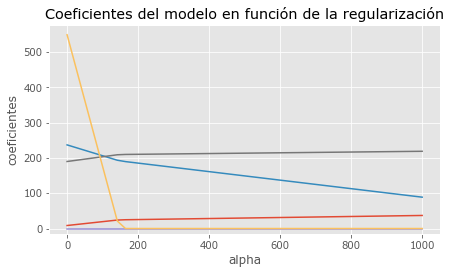

In [286]:
# Evolución de los coeficientes en función de alpha
# ==============================================================================
alphas = modelo.alphas_
coefs = []

for alpha in alphas:
    modelo_temp = Lasso(alpha=alpha, fit_intercept=False, normalize=True)
    modelo_temp.fit(X_train, y_train)
    coefs.append(modelo_temp.coef_.flatten())

fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(alphas, coefs)
#ax.set_xscale('log')
ax.set_ylim([-15,None])
ax.set_xlabel('alpha')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo en función de la regularización');

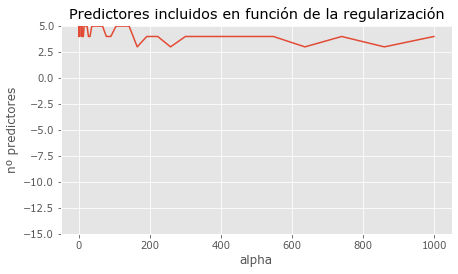

In [261]:
# Número de predictores incluidos (coeficiente !=0) en función de alpha
# ==============================================================================
alphas = modelo.alphas_
n_predictores = []

for alpha in alphas:
    modelo_temp = Lasso(alpha=alpha, fit_intercept=False, normalize=True)
    modelo_temp.fit(X_train, y_train)
    coef_no_cero = np.sum(modelo_temp.coef_.flatten() != 0)
    n_predictores.append(coef_no_cero)

fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(alphas, n_predictores)
#ax.set_xscale('log')
ax.set_ylim([-15,None])
ax.set_xlabel('alpha')
ax.set_ylabel('nº predictores')
ax.set_title('Predictores incluidos en función de la regularización');

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

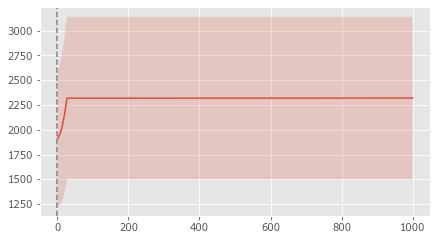

In [263]:
# Evolución del error en función de alpha
# ==============================================================================
# modelo.mse_path_ almacena el mse de cv para cada valor de alpha. Tiene
# dimensiones (n_alphas, n_folds)
mse_cv = modelo.mse_path_.mean(axis=1)
mse_sd = modelo.mse_path_.std(axis=1)

# Se aplica la raíz cuadrada para pasar de mse a rmse
rmse_cv = np.sqrt(mse_cv)
rmse_sd = np.sqrt(mse_sd)

# Se identifica el óptimo y el óptimo + 1std
min_rmse     = np.min(rmse_cv)
sd_min_rmse  = rmse_sd[np.argmin(rmse_cv)]
min_rsme_1sd = np.max(rmse_cv[rmse_cv <= min_rmse + sd_min_rmse])
optimo       = modelo.alphas_[np.argmin(rmse_cv)]
optimo_1sd   = modelo.alphas_[rmse_cv == min_rsme_1sd]

# Gráfico del error +- 1 desviación estándar
fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(modelo.alphas_, rmse_cv)
ax.fill_between(
    modelo.alphas_,
    rmse_cv + rmse_sd,
    rmse_cv - rmse_sd,
    alpha=0.2
)

ax.axvline(
    x         = optimo,
    c         = "gray",
    linestyle = '--',
    label     = 'óptimo'
)

ax.axvline(
    x         = optimo_1sd,
    c         = "blue",
    linestyle = '--',
    label     = 'óptimo_1sd'
)

ax.set_xscale('log')
ax.set_ylim([0,None])
ax.set_title('Evolución del error CV en función de la regularización')
ax.set_xlabel('alpha')
ax.set_ylabel('RMSE')
plt.legend();



In [288]:
# Mejor valor alpha encontrado + 1sd
# ==============================================================================
min_rmse     = np.min(rmse_cv)
sd_min_rmse  = rmse_sd[np.argmin(rmse_cv)]
min_rsme_1sd = np.max(rmse_cv[rmse_cv <= min_rmse + sd_min_rmse])
optimo       = modelo.alphas_[np.argmin(rmse_cv)]
optimo_1sd   = modelo.alphas_[rmse_cv == min_rsme_1sd]

print(f"Mejor valor de alpha encontrado + 1 desviación estándar: {optimo_1sd}")

Mejor valor de alpha encontrado + 1 desviación estándar: [1.e-10]


In [290]:
# Mejor modelo alpha óptimo + 1sd
# ==============================================================================
modelo = Lasso(alpha=optimo_1sd, normalize=True)
modelo.fit(X_train, y_train)

Lasso(alpha=array([1.e-10]), normalize=True)

In [291]:
# Coeficientes del modelo
# ==============================================================================
df_coeficientes = pd.DataFrame(
                        {'predictor': X_train.columns,
                         'coef': modelo.coef_.flatten()}
                  )

# Predictores incluidos en el modelo (coeficiente != 0)
df_coeficientes[df_coeficientes.coef != 0]

,predictor,coef
0,DiaMes,6.268810e+00
1,DiaSemana,1.940013e+02
2,dia_sem,2.275068e-13
3,Hora,1.875684e+02
4,DiaLaboral,3.611508e+02


El modelo final incluye 5 predictores.

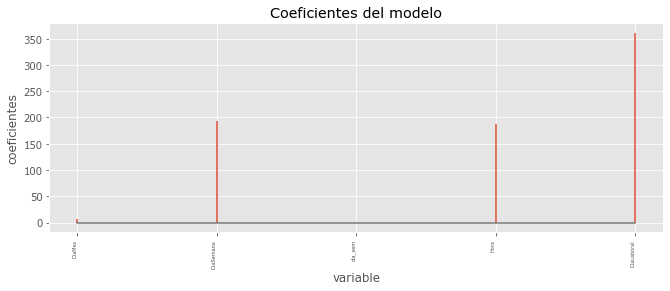

In [292]:
fig, ax = plt.subplots(figsize=(11, 3.84))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=5)
ax.set_xlabel('variable')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo');

In [293]:
# Predicciones test
# ==============================================================================
predicciones = modelo.predict(X=X_test)
predicciones = predicciones.flatten()
predicciones[:5]

array([4547.49853423, 3259.43066824, 4629.15715101, 2234.48513025,
       2265.82917889])

In [294]:
# Error de test del modelo 
# ==============================================================================
rmse_lasso = mean_squared_error(
                y_true  = y_test,
                y_pred  = predicciones,
                squared = False
             )
print("")
print(f"El error (rmse) de test es: {rmse_lasso}")


El error (rmse) de test es: 1828.3209201960467


Las predicciones del modelo final se alejan en promedio 1828.32 unidades del valor real.

ELASTICNET

In [295]:
# Creación y entrenamiento del modelo (con búsqueda por CV del valor óptimo alpha)
# ==============================================================================
# Por defecto ElasticNetCV utiliza el mean squared error
modelo = ElasticNetCV(
            l1_ratio        = [0, 0.1, 0.5, 0.7, 0.9, 0.95, 0.99],
            alphas          = np.logspace(-10, 3, 200),
            normalize       = True,
            cv              = 10
         )
_ = modelo.fit(X = X_train, y = y_train)

In [296]:
# Evolución del error en función de alpha y l1_ratio
# ==============================================================================
# modelo.mse_path_ almacena el mse de cv para cada valor de alpha y l1_ratio.
# Tiene dimensiones (n_l1_ratio, n_alpha, n_folds)

# Error medio de las 10 particiones por cada valor de alpha y l1_ratio 
mean_error_cv = modelo.mse_path_.mean(axis =2)

# El resultado es un array de dimensiones (n_l1_ratio, n_alpha)
# Se convierte en un dataframe
df_resultados_cv = pd.DataFrame(
                        data   = mean_error_cv.flatten(),
                        index  = pd.MultiIndex.from_product(
                                    iterables = [modelo.l1_ratio, modelo.alphas_],
                                    names     = ['l1_ratio', 'modelo.alphas_']
                                 ),
                        columns = ["mse_cv"]
                    )

df_resultados_cv['rmse_cv'] = np.sqrt(df_resultados_cv['mse_cv'])
df_resultados_cv = df_resultados_cv.reset_index().sort_values('mse_cv', ascending = True)
df_resultados_cv

,l1_ratio,modelo.alphas_,mse_cv,rmse_cv
529,0.50,0.000004,3.652367e+06,1911.116595
333,0.10,0.000002,3.652367e+06,1911.116599
918,0.90,0.000020,3.652367e+06,1911.116609
1114,0.95,0.000036,3.652367e+06,1911.116629
134,0.00,0.000002,3.652367e+06,1911.116637
...,...,...,...,...
801,0.90,860.346442,5.382360e+06,2319.991422
613,0.70,141.499130,5.382360e+06,2319.991422
1200,0.99,1000.000000,5.382360e+06,2319.991422
1202,0.99,740.196000,5.382360e+06,2319.991422


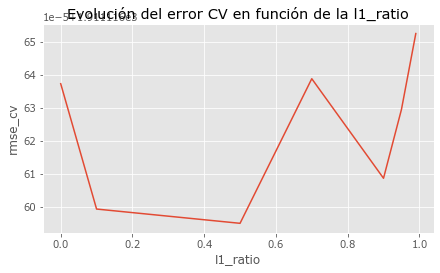

In [297]:
# Mejor valor encontrado para cada l1_ratio
fig, ax = plt.subplots(figsize=(7, 3.84))
df_resultados_cv.groupby('l1_ratio')['rmse_cv'].min().plot(ax = ax)
ax.set_title('Evolución del error CV en función de la l1_ratio')
ax.set_xlabel('l1_ratio')
ax.set_ylabel('rmse_cv');

In [298]:
# Mejor valor alpha y l1_ratio_ encontrado
# ==============================================================================
print(f"Mejor valor de alpha encontrado: {modelo.alpha_}")
print(f"Mejor valor de l1_ratio encontrado: {modelo.l1_ratio_}")

Mejor valor de alpha encontrado: 3.7399373024788014e-06
Mejor valor de l1_ratio encontrado: 0.5


In [299]:
# Coeficientes del modelo
# ==============================================================================
df_coeficientes = pd.DataFrame(
                        {'predictor': X_train.columns,
                         'coef': modelo.coef_.flatten()}
                  )

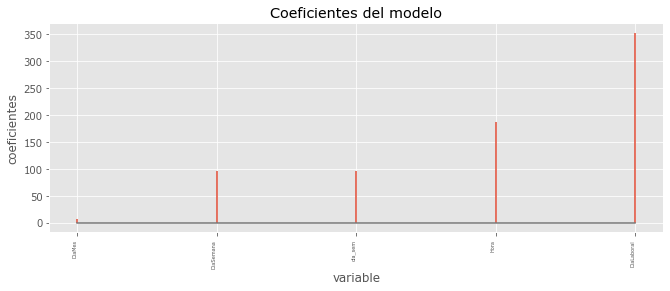

In [300]:
fig, ax = plt.subplots(figsize=(11, 3.84))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=5)
ax.set_xlabel('variable')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo');

In [301]:
# Predicciones test
# ==============================================================================
predicciones = modelo.predict(X=X_test)
predicciones = predicciones.flatten()

In [302]:
# Error de test del modelo 
# ==============================================================================
rmse_elastic = mean_squared_error(
                y_true  = y_test,
                y_pred  = predicciones,
                squared = False
               )
print("")
print(f"El error (rmse) de test es: {rmse_elastic}")


El error (rmse) de test es: 1828.5529066712313


Las predicciones del modelo final se alejan en promedio 1828.55 unidades del valor real.

In [ ]:
COMPARACIÓN MODELOS

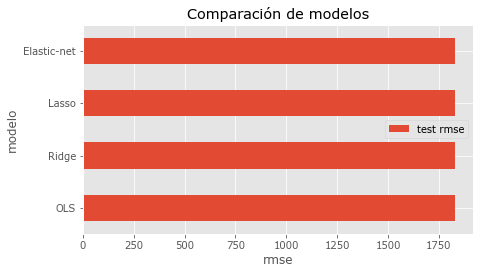

In [303]:
df_comparacion = pd.DataFrame({
                    'modelo': ['OLS', 'Ridge', 'Lasso', 'Elastic-net'],
                    'test rmse': [rmse_ols, rmse_ridge, rmse_lasso, rmse_elastic]
                 })

fig, ax = plt.subplots(figsize=(7, 3.84))
df_comparacion.set_index('modelo').plot(kind='barh', ax=ax)
ax.set_xlabel('rmse')
ax.set_ylabel('modelo')
ax.set_title('Comparación de modelos');

In [ ]:
Todos los valores rmse obtenidos son bastante similares, sin embargo en este caso el mejor modelo se obtiene aplicando regularización OLS. 